Import Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [25]:
batting_summary = pd.read_csv("/content/drive/MyDrive/World cup 2023/Copy of batting_summary.csv")
bowling_summary = pd.read_csv("/content/drive/MyDrive/World cup 2023/Copy of bowling_summary.csv")
match_schedule = pd.read_csv("/content/drive/MyDrive/World cup 2023/Copy of match_schedule_results.csv")
world_cup_player = pd.read_csv("/content/drive/MyDrive/World cup 2023/Copy of world_cup_players_info.csv")

Data Cleaning

In [26]:
batting_summary.isnull().sum()
bowling_summary.isnull().sum()
match_schedule.isnull().sum()
world_cup_player.isnull().sum()

,0
player_name,0
team_name,0
image_of_player,66
battingStyle,0
bowlingStyle,6
playingRole,0
description,17


In [28]:
world_cup_player = world_cup_player.drop(columns=['image_of_player'])

world_cup_player['bowlingStyle'] = world_cup_player['bowlingStyle'].fillna('Not Applicable')
world_cup_player['description'] = world_cup_player['description'].fillna('No description')

world_cup_player.isnull().sum()

,0
player_name,0
team_name,0
battingStyle,0
bowlingStyle,0
playingRole,0
description,0


EDA

Top 10 batsmen

In [29]:
top_batsmen = (
    batting_summary
    .groupby('Batsman_Name')['Runs']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_batsmen

,Runs
Batsman_Name,
Virat Kohli,765
Quinton de Kock,706
Rohit Sharma,597
Rachin Ravindra,578
David Warner,577
Daryl Mitchell,552
Shreyas Iyer,530
Rassie van der Dussen,480
David Miller,474


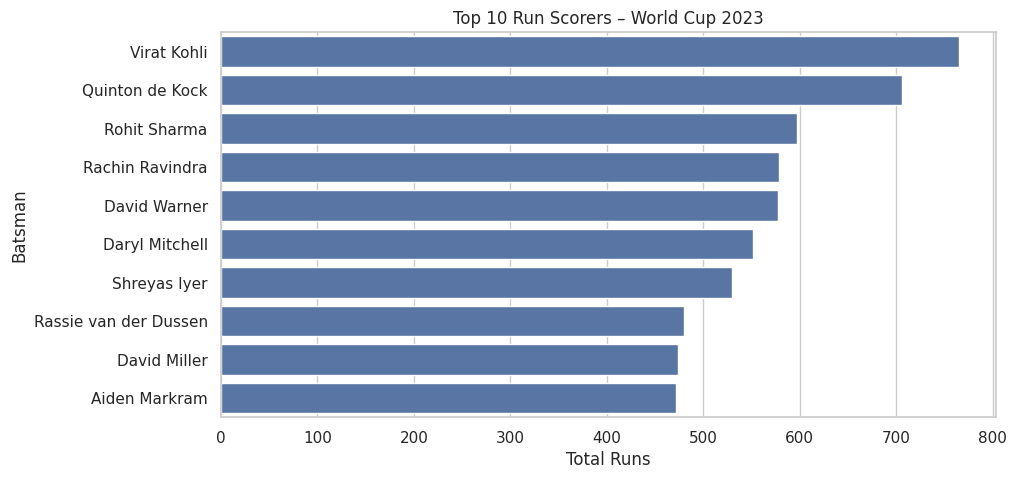

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index)
plt.title("Top 10 Run Scorers – World Cup 2023")
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.show()

In [31]:
strike_rate = (
    batting_summary
    .groupby('Batsman_Name')
    .agg({'Runs':'sum', 'Balls':'sum'})
)

strike_rate['Strike_Rate'] = (strike_rate['Runs'] / strike_rate['Balls']) * 100

strike_rate.sort_values(by='Strike_Rate', ascending=False).head(10)


,Runs,Balls,Strike_Rate
Batsman_Name,,,
Reece Topley,16,9,177.777778
Gus Atkinson,37,23,160.869565
Glenn Maxwell,404,288,140.277778
Hardik Pandya,11,8,137.500000
Mark Wood,85,64,132.812500
Travis Head,391,306,127.777778
Mujeeb Ur Rahman,51,40,127.500000
Mitchell Santner,103,81,127.160494
Heinrich Klaasen,449,355,126.478873


In [32]:
top_bowlers = (
    bowling_summary
    .groupby('Bowler_Name')['Wickets']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_bowlers


,Wickets
Bowler_Name,
Mohammed Shami,24
Adam Zampa,23
Dilshan Madushanka,21
Gerald Coetzee,20
Jasprit Bumrah,20
Shaheen Afridi,18
Marco Jansen,17
Josh Hazlewood,16
Mitchell Starc,16


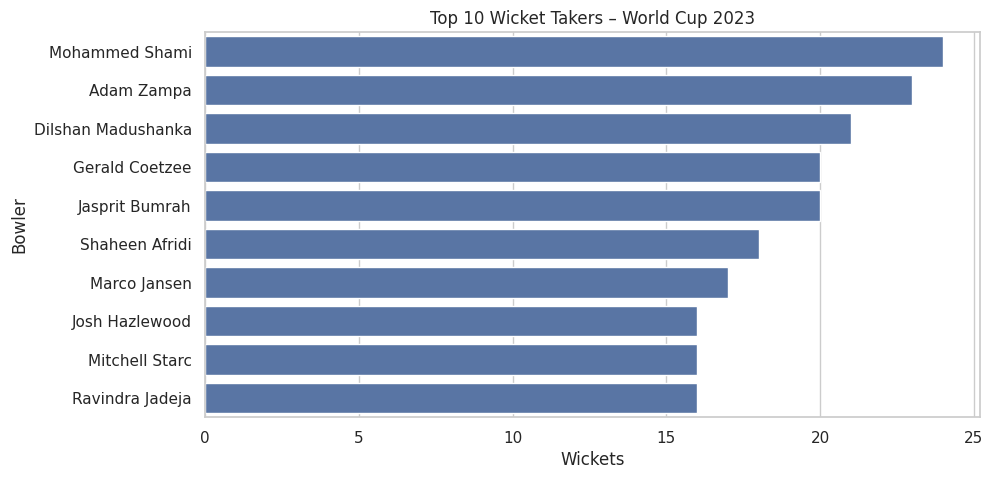

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index)
plt.title("Top 10 Wicket Takers – World Cup 2023")
plt.xlabel("Wickets")
plt.ylabel("Bowler")
plt.show()


In [34]:
bowling_efficiency = (
    bowling_summary
    .groupby('Bowler_Name')
    .agg({'Runs':'sum', 'Overs':'sum', 'Wickets':'sum'})
)

bowling_efficiency['Economy'] = bowling_efficiency['Runs'] / bowling_efficiency['Overs']

bowling_efficiency.sort_values(by='Economy').head(10)


,Runs,Overs,Wickets,Economy
Bowler_Name,,,,
Ravichandran Ashwin,34,10.0,1,3.400000
Jasprit Bumrah,373,91.5,20,4.076503
Mohammad Nabi,254,61.3,8,4.143556
Keshav Maharaj,370,89.0,15,4.157303
Ravindra Jadeja,398,92.9,16,4.284177
Kuldeep Yadav,424,95.1,15,4.458465
Rashid Khan,388,86.3,11,4.495944
Virat Kohli,15,3.3,1,4.545455
Aiden Markram,85,18.3,1,4.644809


In [35]:
team_wins = match_schedule['Winner'].value_counts()

team_wins


,count
Winner,
Australia,9
India,9
South Africa,7
New Zealand,5
Pakistan,4
Afghanistan,4
Sri Lanka,3
England,3
Bangladesh,2


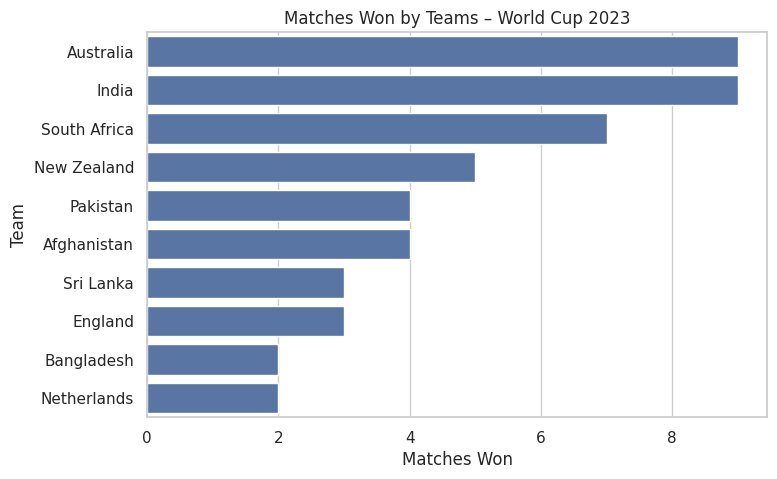

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(x=team_wins.values, y=team_wins.index)
plt.title("Matches Won by Teams – World Cup 2023")
plt.xlabel("Matches Won")
plt.ylabel("Team")
plt.show()


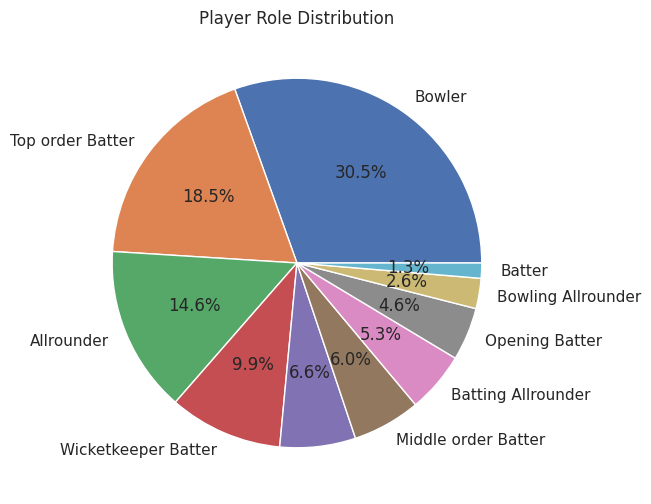

In [37]:
world_cup_player['playingRole'].value_counts()
plt.figure(figsize=(6,6))
world_cup_player['playingRole'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Player Role Distribution")
plt.ylabel("")
plt.show()


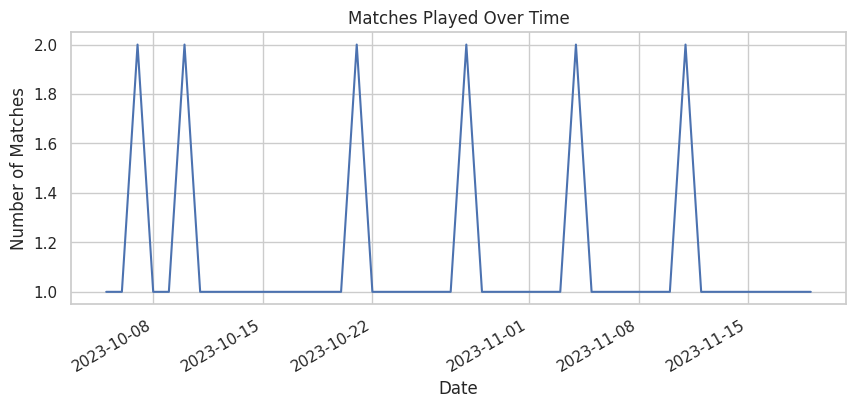

In [39]:
match_schedule['Date'] = pd.to_datetime(match_schedule['Date'])

matches_over_time = match_schedule.groupby('Date')['Match_no'].count()

matches_over_time.plot(figsize=(10,4))
plt.title("Matches Played Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Matches")
plt.show()
